In [810]:
import sys
!{sys.executable} -m pip install uszipcode

In [811]:
import sys
!{sys.executable} -m pip install imbalanced-learn

In [812]:
import sys
!{sys.executable} -m pip install xgboost

In [814]:
import sys
!{sys.executable} -m pip install lightgbm

In [813]:
import pandas as pd
import seaborn as sns
from uszipcode import SearchEngine, SimpleZipcode, Zipcode
import matplotlib.pyplot as plt
import numpy as np

In [520]:
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

import xgboost as xgb
from xgboost.sklearn import XGBClassifier

from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.preprocessing import LabelEncoder

from sklearn.pipeline import Pipeline

In [815]:
train = pd.read_csv("uconn_comp_2018_train.csv")
test = pd.read_csv("uconn_comp_2018_test.csv")

In [816]:
train['set'] = "train"
test['set'] = "test"
test['fraud'] = "N/A"

In [817]:
test.head()

,claim_number,age_of_driver,gender,marital_status,safty_rating,annual_income,high_education_ind,address_change_ind,living_status,zip_code,...,channel,policy_report_filed_ind,claim_est_payout,age_of_vehicle,vehicle_category,vehicle_price,vehicle_color,vehicle_weight,set,fraud
0,2,39,M,1.0,73,36633,1,0,Own,50048,...,Phone,0,5196.552552,8.0,Large,24360.59273,silver,26633.27819,test,N/A
1,9,56,M,1.0,63,40252,1,1,Own,85068,...,Broker,1,7381.165248,6.0,Large,39710.42665,other,15875.34874,test,N/A
2,11,39,F,0.0,75,36634,1,1,Own,20115,...,Broker,1,5612.123938,7.0,Medium,50327.56618,silver,21365.05932,test,N/A
3,13,33,M,1.0,72,34960,0,1,Own,50006,...,Phone,0,7957.267641,2.0,Medium,23457.35282,black,26707.46021,test,N/A
4,14,24,F,1.0,70,31776,1,1,Rent,20122,...,Online,0,6232.195932,1.0,Medium,18238.39202,silver,22949.73744,test,N/A


In [818]:
train = pd.concat([train,test], sort = True)

In [819]:
print("# of Rows in data:     " + str(train.shape[0]))
print("# of Columns in data:  " + str(train.shape[1]))
print("Sample Data")
train.head()

# of Rows in data:     30000
# of Columns in data:  26
Sample Data


,accident_site,address_change_ind,age_of_driver,age_of_vehicle,annual_income,channel,claim_date,claim_day_of_week,claim_est_payout,claim_number,...,past_num_of_claims,policy_report_filed_ind,safty_rating,set,vehicle_category,vehicle_color,vehicle_price,vehicle_weight,witness_present_ind,zip_code
0,Local,1,41,2.0,37130,Broker,12/5/2015,Saturday,3011.347886,10743,...,0,0,71,train,Compact,red,12143.728800,2429.429302,0.0,85001
1,Parking Lot,1,44,4.0,37868,Phone,10/8/2016,Saturday,4687.252280,28633,...,0,1,49,train,Large,red,11806.026700,2450.138635,0.0,85024
2,Local,1,27,4.0,32963,Broker,9/29/2016,Thursday,3452.309502,5766,...,0,1,63,train,Large,gray,11520.568440,2591.881965,1.0,80025
3,Parking Lot,0,50,2.0,39102,Broker,2/11/2015,Wednesday,3187.409496,15895,...,0,1,86,train,Large,black,8848.202851,2713.474095,0.0,80022
4,Local,0,37,7.0,36103,Broker,12/26/2016,Monday,2982.306201,23799,...,0,1,90,train,Large,black,14557.293570,2733.726122,1.0,50013


In [820]:
train.isnull().sum()[train.isnull().sum()>0]

age_of_vehicle          11
claim_est_payout        31
marital_status           7
witness_present_ind    220
dtype: int64

In [821]:
train = train.loc[train["fraud"] != -1]

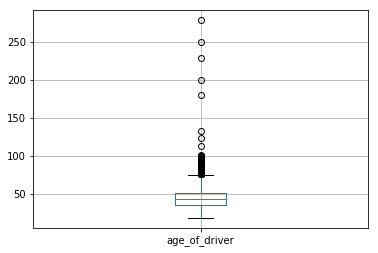

In [822]:
train.boxplot(column='age_of_driver')

In [823]:
train.describe()

,address_change_ind,age_of_driver,age_of_vehicle,annual_income,claim_est_payout,claim_number,high_education_ind,liab_prct,marital_status,past_num_of_claims,policy_report_filed_ind,safty_rating,vehicle_price,vehicle_weight,witness_present_ind,zip_code
count,29997.000000,29997.000000,29986.000000,29997.000000,29966.000000,29997.000000,29997.000000,29997.000000,29990.000000,29997.000000,29997.000000,29997.000000,29997.000000,29997.000000,29777.000000,29997.000000
mean,0.577058,43.627763,4.992463,37353.267827,4991.987470,15000.423042,0.698803,49.565657,0.713671,0.500917,0.600893,73.618929,23024.451854,22963.217456,0.235114,49827.116378
std,0.494035,12.057464,2.246018,2944.944353,2232.453493,8660.102459,0.458786,33.639116,0.452052,0.955700,0.489723,15.359929,12037.059296,12111.165666,0.424077,29181.361742
min,0.000000,18.000000,0.000000,-1.000000,282.639432,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2261.507903,2429.429302,0.000000,0.000000
25%,0.000000,35.000000,3.000000,35552.000000,3347.924495,7501.000000,0.000000,17.000000,0.000000,0.000000,0.000000,65.000000,14205.539950,14038.867460,0.000000,20111.000000
50%,1.000000,43.000000,5.000000,37609.000000,4670.220900,15000.000000,1.000000,50.000000,1.000000,0.000000,1.000000,76.000000,20803.750330,20715.187370,0.000000,50027.000000
75%,1.000000,51.000000,6.000000,39317.000000,6275.691874,22500.000000,1.000000,81.000000,1.000000,1.000000,1.000000,85.000000,29443.492970,29354.084120,0.000000,80037.000000
max,1.000000,278.000000,16.000000,56275.000000,23903.366250,30000.000000,1.000000,100.000000,1.000000,6.000000,1.000000,100.000000,127063.506000,123016.650400,1.000000,85083.000000


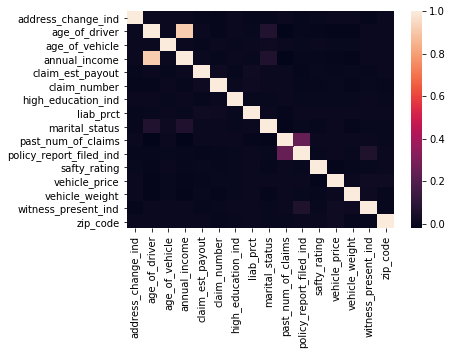

In [824]:
sns.heatmap(train.corr(method = 'pearson'));

In [825]:
train.loc[train['age_of_driver'] > 100, 'age_of_driver'] = 100

In [826]:
train = train.loc[train["zip_code"] != 0]

In [827]:
search = SearchEngine()
z_code = [ ]
z = train["zip_code"]
for i in train["zip_code"]:
    zipcode = search.by_zipcode(i)
    state = zipcode.state_abbr
    z_code.append(state)   

train['state'] = z_code

In [828]:
# Imputing missing values for marital status
print(pd.concat([train.groupby('marital_status').size(), train.groupby('marital_status').size()/
                 len(train)],axis=1).rename(columns={0: 'Count', 1: 'Percentage'}))

                Count  Percentage
marital_status                   
0.0              8570    0.286105
1.0             21377    0.713661


In [829]:
# Imputing marital status with value 1 as there are only 5 records with null values and 70% data has value as 1
train['marital_status'].fillna(value=1,inplace=True)

In [830]:
# imputing age of vehicle. There are only 8 records. Hence imputing with mean value
train['age_of_vehicle'].fillna(value=5,inplace=True)
train['age_of_vehicle']=train['age_of_vehicle'].astype('int64')

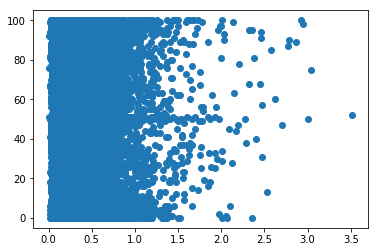

In [831]:
Claim_price_pc =train['claim_est_payout']/train['vehicle_price']
plt.scatter(Claim_price_pc,train['liab_prct']);

C:\Users\shahs_pi8a6lu\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\shahs_pi8a6lu\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\shahs_pi8a6lu\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


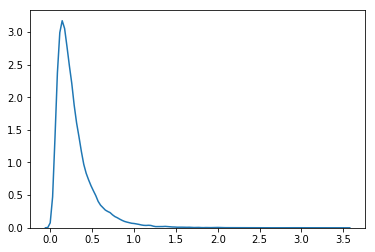

In [832]:
sns.kdeplot(Claim_price_pc);

In [833]:
# imputing claim estimate payout with 30% of the vehicle price
train['claim_est_payout'].fillna(train['vehicle_price']*.3,inplace=True)

In [834]:
# Imputing missing values for witness_present_ind
print(pd.concat([train.groupby('witness_present_ind').size(), train.groupby('witness_present_ind').size()/len(train)],axis=1).rename(columns={0: 'Count', 1: 'Percentage'}))

                     Count  Percentage
witness_present_ind                   
0.0                  22741    0.759197
1.0                   6993    0.233458


In [835]:
train['witness_present_ind'].fillna(value=0,inplace=True)

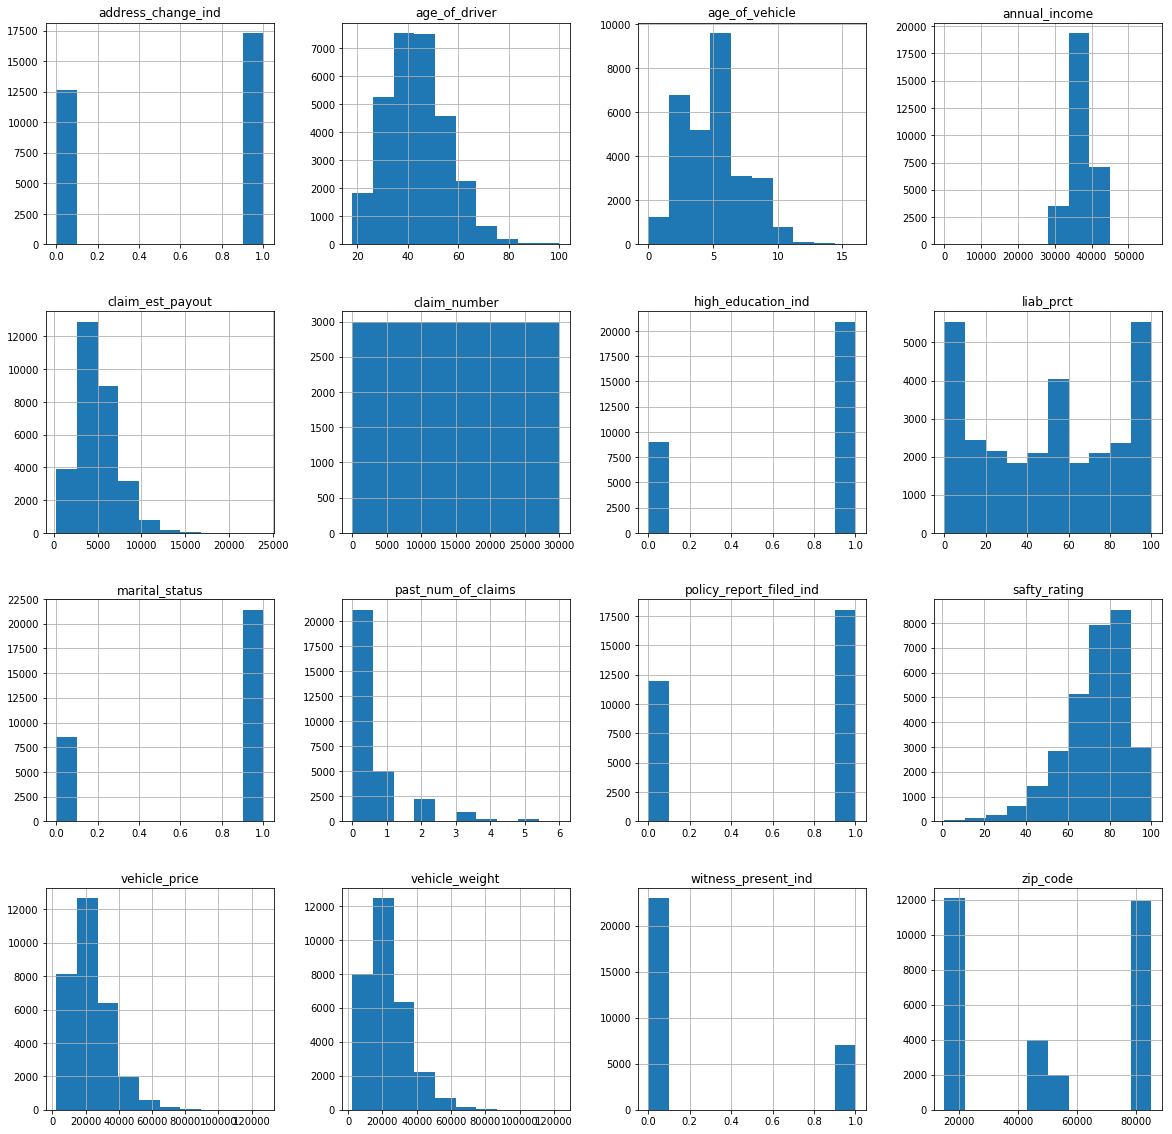

In [836]:
train.hist(figsize = [20,20]);

In [837]:
# making categories based on quartile ranges and Std deviation
train['age_of_driver_new'] = train.age_of_driver
train['age_of_driver_new'][train.age_of_driver >= 51] = 'Old Driver'
train['age_of_driver_new'][(train.age_of_driver >= 35) & (train.age_of_driver < 51)] = 'Mid-aged Driver'
train['age_of_driver_new'][train.age_of_driver < 35] = 'Young Driver'

C:\Users\shahs_pi8a6lu\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\shahs_pi8a6lu\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\shahs_pi8a6lu\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [838]:
train['safty_rating_new'] = train.safty_rating
train['safty_rating_new'][train.safty_rating >= 105] = 'Very High'
train['safty_rating_new'][(train.safty_rating >= 90) & (train.safty_rating < 105)] = 'High'
train['safty_rating_new'][(train.safty_rating >= 76) & (train.safty_rating < 90)] = 'High Average'
train['safty_rating_new'][(train.safty_rating >= 65) & (train.safty_rating < 76)] = 'Low Average'
train['safty_rating_new'][(train.safty_rating >= 50) & (train.safty_rating < 65)] = 'Low'
train['safty_rating_new'][train.safty_rating < 50] = 'Very Low'

C:\Users\shahs_pi8a6lu\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\shahs_pi8a6lu\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [839]:
#From our observation we observed that 
#there are inaccuracies with vehicle weights and vehicle_category. 
#Hence recoding this column as per industry specifications
train['vehicle_weight_new'] = train.vehicle_weight
train['vehicle_weight_new'][train.vehicle_weight >= 45000] = 'Extra-Heavy Truck'
train['vehicle_weight_new'][(train.vehicle_weight >= 20000) & (train.vehicle_weight < 45000)] = 'Heavy truck'
train['vehicle_weight_new'][(train.vehicle_weight >= 10000) & (train.vehicle_weight < 20000)] = 'Medium Truck'
train['vehicle_weight_new'][train.vehicle_weight < 10000] = 'Light Truck'

C:\Users\shahs_pi8a6lu\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\shahs_pi8a6lu\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\shahs_pi8a6lu\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\shahs_pi8a6lu\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value

In [840]:
# adding income buckets, classes based on Standard Deviation and Quartile Ranges
train['annual_income_new'] = train.annual_income
train['annual_income_new'][train.annual_income >= 42500] = 'High Income'
train['annual_income_new'][(train.annual_income >= 32500) & (train.annual_income < 42500)] = 'Medium Income'
train['annual_income_new'][train.annual_income < 32500] = 'Low Income'

C:\Users\shahs_pi8a6lu\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\shahs_pi8a6lu\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\shahs_pi8a6lu\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [841]:
## adding Vehicle price buckets, classes based on Standard Deviation and Quartile Ranges
train['vehicle_price_new'] = train.vehicle_price
train['vehicle_price_new'][train.vehicle_price >= 41500] = 'Very High'
train['vehicle_price_new'][(train.vehicle_price >= 29500) & (train.vehicle_price < 41500)] = 'High'
train['vehicle_price_new'][(train.vehicle_price >= 21000) & (train.vehicle_price < 29500)] = 'Average High'
train['vehicle_price_new'][(train.vehicle_price >= 14250) & (train.vehicle_price < 21000)] = 'Average Low'
train['vehicle_price_new'][(train.vehicle_price >= 5000) & (train.vehicle_price < 14250)] = 'Low'
train['vehicle_price_new'][train.vehicle_price < 5000] = 'Very Low'

C:\Users\shahs_pi8a6lu\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\shahs_pi8a6lu\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\shahs_pi8a6lu\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:

In [842]:
train.describe()

,address_change_ind,age_of_driver,age_of_vehicle,annual_income,claim_est_payout,claim_number,high_education_ind,liab_prct,marital_status,past_num_of_claims,policy_report_filed_ind,safty_rating,vehicle_price,vehicle_weight,witness_present_ind,zip_code
count,29954.000000,29954.000000,29954.000000,29954.000000,29954.000000,29954.000000,29954.000000,29954.00000,29954.000000,29954.000000,29954.000000,29954.000000,29954.000000,29954.000000,29954.000000,29954.000000
mean,0.576985,43.600754,4.992455,37352.279729,4994.653635,15004.999933,0.698838,49.56984,0.713895,0.501269,0.601088,73.616646,23021.632522,22966.788955,0.233458,49898.644922
std,0.494046,11.822930,2.246029,2945.782916,2235.227631,8659.500992,0.458771,33.64112,0.451947,0.956058,0.489683,15.362114,12038.661306,12113.727884,0.423038,29141.122995
min,0.000000,18.000000,0.000000,-1.000000,282.639432,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,2261.507903,2429.429302,0.000000,15001.000000
25%,0.000000,35.000000,3.000000,35552.000000,3348.439658,7507.250000,0.000000,17.00000,0.000000,0.000000,0.000000,65.000000,14201.519680,14041.104355,0.000000,20111.000000
50%,1.000000,43.000000,5.000000,37609.000000,4672.123057,15008.500000,1.000000,50.00000,1.000000,0.000000,1.000000,76.000000,20797.854995,20719.644090,0.000000,50028.000000
75%,1.000000,51.000000,6.000000,39317.000000,6279.906090,22503.750000,1.000000,81.00000,1.000000,1.000000,1.000000,85.000000,29443.164630,29360.468502,0.000000,80038.000000
max,1.000000,100.000000,16.000000,56275.000000,23903.366250,30000.000000,1.000000,100.00000,1.000000,6.000000,1.000000,100.000000,127063.506000,123016.650400,1.000000,85083.000000


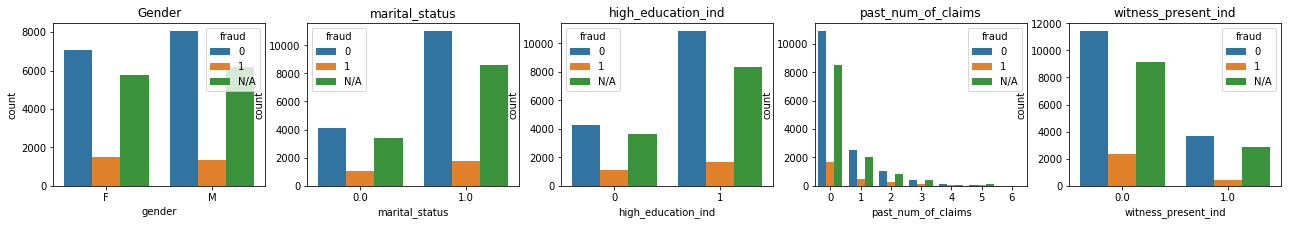

In [847]:
fig, ax=plt.subplots(1,5,figsize=(22,3))
ax[0].set_title('Gender')
sns.countplot('gender',hue='fraud',data=train,ax=ax[0])
ax[1].set_title('marital_status')
sns.countplot('marital_status',hue='fraud',data=train,ax=ax[1])
ax[2].set_title('high_education_ind')
sns.countplot('high_education_ind',hue='fraud',data=train,ax=ax[2])
ax[3].set_title('past_num_of_claims')
sns.countplot('past_num_of_claims',hue='fraud',data=train,ax=ax[3]);
ax[4].set_title('witness_present_ind')
sns.countplot('witness_present_ind',hue='fraud',data=train,ax=ax[4]);

In [848]:
train.head()

,accident_site,address_change_ind,age_of_driver,age_of_vehicle,annual_income,channel,claim_date,claim_day_of_week,claim_est_payout,claim_number,...,vehicle_price,vehicle_weight,witness_present_ind,zip_code,state,age_of_driver_new,safty_rating_new,vehicle_weight_new,annual_income_new,vehicle_price_new
0,Local,1,41,2,37130,Broker,12/5/2015,Saturday,3011.347886,10743,...,12143.728800,2429.429302,0.0,85001,AZ,Mid-aged Driver,Low Average,Light Truck,Medium Income,Low
1,Parking Lot,1,44,4,37868,Phone,10/8/2016,Saturday,4687.252280,28633,...,11806.026700,2450.138635,0.0,85024,AZ,Mid-aged Driver,Very Low,Light Truck,Medium Income,Low
2,Local,1,27,4,32963,Broker,9/29/2016,Thursday,3452.309502,5766,...,11520.568440,2591.881965,1.0,80025,CO,Young Driver,Low,Light Truck,Medium Income,Low
3,Parking Lot,0,50,2,39102,Broker,2/11/2015,Wednesday,3187.409496,15895,...,8848.202851,2713.474095,0.0,80022,CO,Mid-aged Driver,High Average,Light Truck,Medium Income,Low
4,Local,0,37,7,36103,Broker,12/26/2016,Monday,2982.306201,23799,...,14557.293570,2733.726122,1.0,50013,IA,Mid-aged Driver,High,Light Truck,Medium Income,Average Low


In [849]:
train['IsWeekday']=np.where((train['claim_day_of_week']=='Saturday')|(train['claim_day_of_week']=='Sunday'),0,1)

In [850]:
train['claim_date'] = pd.to_datetime(train.claim_date)
train['claim_quarter'] = pd.PeriodIndex(train.claim_date, freq = 'Q') 
train['claim_month'] = pd.PeriodIndex(train.claim_date, freq = 'M') 
train['claim_year'] = pd.PeriodIndex(train.claim_date, freq = 'Y') 
train[['claim_date','claim_quarter','claim_month','claim_year']].head()

,claim_date,claim_quarter,claim_month,claim_year
0,2015-12-05,2015Q4,2015-12,2015
1,2016-10-08,2016Q4,2016-10,2016
2,2016-09-29,2016Q3,2016-09,2016
3,2015-02-11,2015Q1,2015-02,2015
4,2016-12-26,2016Q4,2016-12,2016


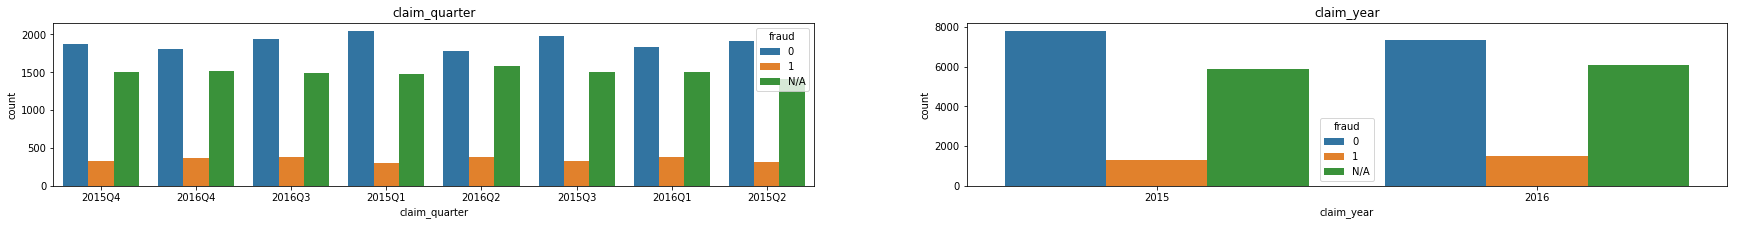

In [854]:
fig, ax=plt.subplots(1,2,figsize=(30,3))
ax[0].set_title('claim_quarter')
sns.countplot('claim_quarter',hue='fraud',data=train,ax=ax[0])
ax[1].set_title('claim_year')
sns.countplot('claim_year',hue='fraud',data=train,ax=ax[1])

In [855]:
train.groupby(['vehicle_category'])['age_of_vehicle'].mean()

vehicle_category
Compact    4.989182
Large      4.995274
Medium     4.992953
Name: age_of_vehicle, dtype: float64

In [856]:
train['age_of_vehicle'] = train.groupby(['vehicle_category'])['age_of_vehicle'].transform(lambda x: x.fillna(x.mean()))

In [857]:
# adding age of vehcile buckets, classes based on Standard Deviation and Quartile Ranges
train['age_of_vehicle_new'] = train.age_of_vehicle
train['age_of_vehicle_new'][train.age_of_vehicle >= 6] = 'Very High'
train['age_of_vehicle_new'][(train.age_of_vehicle >= 5) & (train.age_of_vehicle < 6)] = 'High'
train['age_of_vehicle_new'][(train.age_of_vehicle >= 3) & (train.age_of_vehicle < 5)] = 'Low'
train['age_of_vehicle_new'][train.age_of_vehicle < 3] = 'Very Low'

C:\Users\shahs_pi8a6lu\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\shahs_pi8a6lu\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\shahs_pi8a6lu\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:

In [858]:
train['gender'] = train['gender'].astype('object')
train['marital_status'] = train['marital_status'].astype('object')
train['high_education_ind'] = train['high_education_ind'].astype('object')
train['address_change_ind'] = train['address_change_ind'].astype('object')
train['living_status'] = train['living_status'].astype('object')
train['IsWeekday'] = train['IsWeekday'].astype('object')
train['accident_site'] = train['accident_site'].astype('object')
train['witness_present_ind'] = train['witness_present_ind'].astype('object')
train['channel'] = train['channel'].astype('object')
train['policy_report_filed_ind'] = train['policy_report_filed_ind'].astype('object')
#data['vehicle_category'] = data['vehicle_category'].astype('object')
train['age_of_vehicle_new'] = train['age_of_vehicle_new'].astype('object')
train['age_of_driver_new'] = train['age_of_driver_new'].astype('object')
train['safty_rating_new'] = train['safty_rating_new'].astype('object')
#train['vehicle_price_buckets'] = train['vehicle_price_buckets'].astype('object')
train['vehicle_weight_new'] = train['vehicle_weight_new'].astype('object')
train['annual_income_new'] = train['annual_income_new'].astype('object')


In [859]:
def categorical_features(df):
    features = [col for col in list(df.columns) if df[col].dtype == 'object']
    return features

In [860]:
def factorize_categorical(df, catg):
    for col in catg:
        df[col], _ = pd.factorize(df[col])
    return df 

In [861]:
def get_dummies(df, dum):
    for col in dum:
        df = pd.concat([df, pd.get_dummies(df[col], prefix=col)], axis=1)
    return df 

In [862]:
#why to use dummy variables in regression:
#dummy variables are useful as they enable us to use single regression equation to represent multiple groups i.e we need not 
#write separate equation models for each subgroup

#data=rawdata.copy()
#train['age_of_driver_new']=pd.cut(train['age_of_driver'],bins=[0,30, 50, 70, 90,102])
#train=pd.get_dummies(train,columns=['living_status','accident_site','channel','vehicle_category','age_of_driver_new'],prefix_sep='_')
#data.drop(['zip_code','claim_date','claim_est_payout','vehicle_price','state_id','channel','policy_report_filed_ind','vehicle_weight','vehicle_color','vehicle_category','liab_prct'],axis=1,inplace=True)
train.drop(['claim_number','annual_income','vehicle_weight','vehicle_category','zip_code','claim_date','age_of_driver','age_of_vehicle','vehicle_price','claim_day_of_week','vehicle_color','state','claim_quarter','claim_year','claim_month','set'],axis=1,inplace=True)


In [863]:
train_new = train.loc[train['fraud'] !='N/A']

In [864]:
test_new = train.loc[train['fraud'] == "N/A"]

In [865]:
train_cat = categorical_features(train_new)
print(train_cat)


['accident_site', 'address_change_ind', 'channel', 'fraud', 'gender', 'high_education_ind', 'living_status', 'marital_status', 'policy_report_filed_ind', 'witness_present_ind', 'age_of_driver_new', 'safty_rating_new', 'vehicle_weight_new', 'annual_income_new', 'vehicle_price_new', 'IsWeekday', 'age_of_vehicle_new']


In [866]:
test_cat = categorical_features(test_new)
print(test_cat)

['accident_site', 'address_change_ind', 'channel', 'fraud', 'gender', 'high_education_ind', 'living_status', 'marital_status', 'policy_report_filed_ind', 'witness_present_ind', 'age_of_driver_new', 'safty_rating_new', 'vehicle_weight_new', 'annual_income_new', 'vehicle_price_new', 'IsWeekday', 'age_of_vehicle_new']


In [867]:
train_new = factorize_categorical( train_new, train_cat)

C:\Users\shahs_pi8a6lu\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [868]:
test_new = factorize_categorical( test_new, test_cat)

C:\Users\shahs_pi8a6lu\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [869]:
train_new = get_dummies(train_new, train_cat)

In [870]:
test_new = get_dummies(test_new,test_cat)

In [871]:
test_new = test_new.drop(['fraud','fraud_0'], axis = 1)

In [872]:
X_train = train_new.drop(['fraud_0','fraud_1','fraud'], axis = 1)
Y_train = train_new['fraud']

In [873]:
# to divide train and test set
from sklearn.model_selection import train_test_split
#X_train = train_new.drop(['fraud'], axis = 1)
#X_train = train_
#Y_train = train_dummies['fraud']
X_train, X_test, Y_train, Y_test = train_test_split(X_train,Y_train,test_size=0.25,random_state=0)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((13479, 67), (4493, 67), (13479,), (4493,))

In [874]:
# Splitting train data again to apply SMOTE
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42, ratio =1)
X_train_sm, Y_train_sm = sm.fit_sample(X_train, Y_train)

In [875]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train_sm)
X_test_std = sc.transform(X_test)
test_new_std = sc.transform(test_new)

C:\Users\shahs_pi8a6lu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Train/Test split results:
LogisticRegression accuracy is 0.650
LogisticRegression log_loss is 0.627
LogisticRegression auc is 0.724


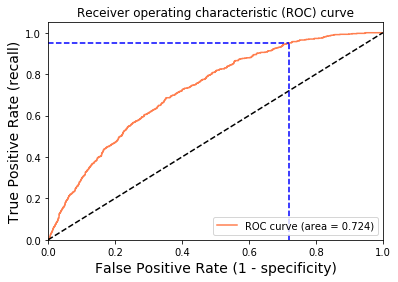

Using a threshold of 0.273 guarantees a sensitivity of 0.951 and a specificity of 0.280, i.e. a false positive rate of 71.95%.


In [876]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss
from sklearn.linear_model import LogisticRegression

# check classification scores of logistic regression
log_reg = LogisticRegression()
log_reg.fit(X_train_std, Y_train_sm)
Y_Pred = log_reg.predict(X_test_std)
Y_Pred_Prob = log_reg.predict_proba(X_test_std)[:, 1]

[fpr, tpr, thr] = roc_curve(Y_test, Y_Pred_Prob)
print('Train/Test split results:')
print(log_reg.__class__.__name__+" accuracy is %2.3f" % accuracy_score(Y_test, Y_Pred))
print(log_reg.__class__.__name__+" log_loss is %2.3f" % log_loss(Y_test, Y_Pred_Prob))
print(log_reg.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))

idx = np.min(np.where(tpr > 0.95)) # index of the first threshold for which the sensibility > 0.95
plt.figure()
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

print("Using a threshold of %.3f " % thr[idx] + "guarantees a sensitivity of %.3f " % tpr[idx] +  
      "and a specificity of %.3f" % (1-fpr[idx]) + 
      ", i.e. a false positive rate of %.2f%%." % (np.array(fpr[idx])*100))

In [877]:
#fit a decision tree classifier
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(X_train_std, Y_train_sm)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train_std, Y_train_sm)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test_std, Y_test)))

pred_clf = clf.predict(X_test_std)
print(confusion_matrix(Y_test, pred_clf))
print(classification_report(Y_test, pred_clf))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.74
[[3133  707]
 [ 476  177]]
              precision    recall  f1-score   support

           0       0.87      0.82      0.84      3840
           1       0.20      0.27      0.23       653

    accuracy                           0.74      4493
   macro avg       0.53      0.54      0.54      4493
weighted avg       0.77      0.74      0.75      4493



In [878]:
#fit a random forest classifier
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train_std, Y_train_sm)
print('Accuracy of Random Forest Classifier on training set: {:.2f}'
     .format(rfc.score(X_train_std, Y_train_sm)))
print('Accuracy of Random Forest Classifier on test set: {:.2f}'
     .format(rfc.score(X_test_std, Y_test)))

pred_rfc = rfc.predict(X_test_std)
print(confusion_matrix(Y_test, pred_rfc))
print(classification_report(Y_test, pred_rfc))

C:\Users\shahs_pi8a6lu\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy of Random Forest Classifier on training set: 0.99
Accuracy of Random Forest Classifier on test set: 0.85
[[3770   70]
 [ 621   32]]
              precision    recall  f1-score   support

           0       0.86      0.98      0.92      3840
           1       0.31      0.05      0.08       653

    accuracy                           0.85      4493
   macro avg       0.59      0.52      0.50      4493
weighted avg       0.78      0.85      0.80      4493



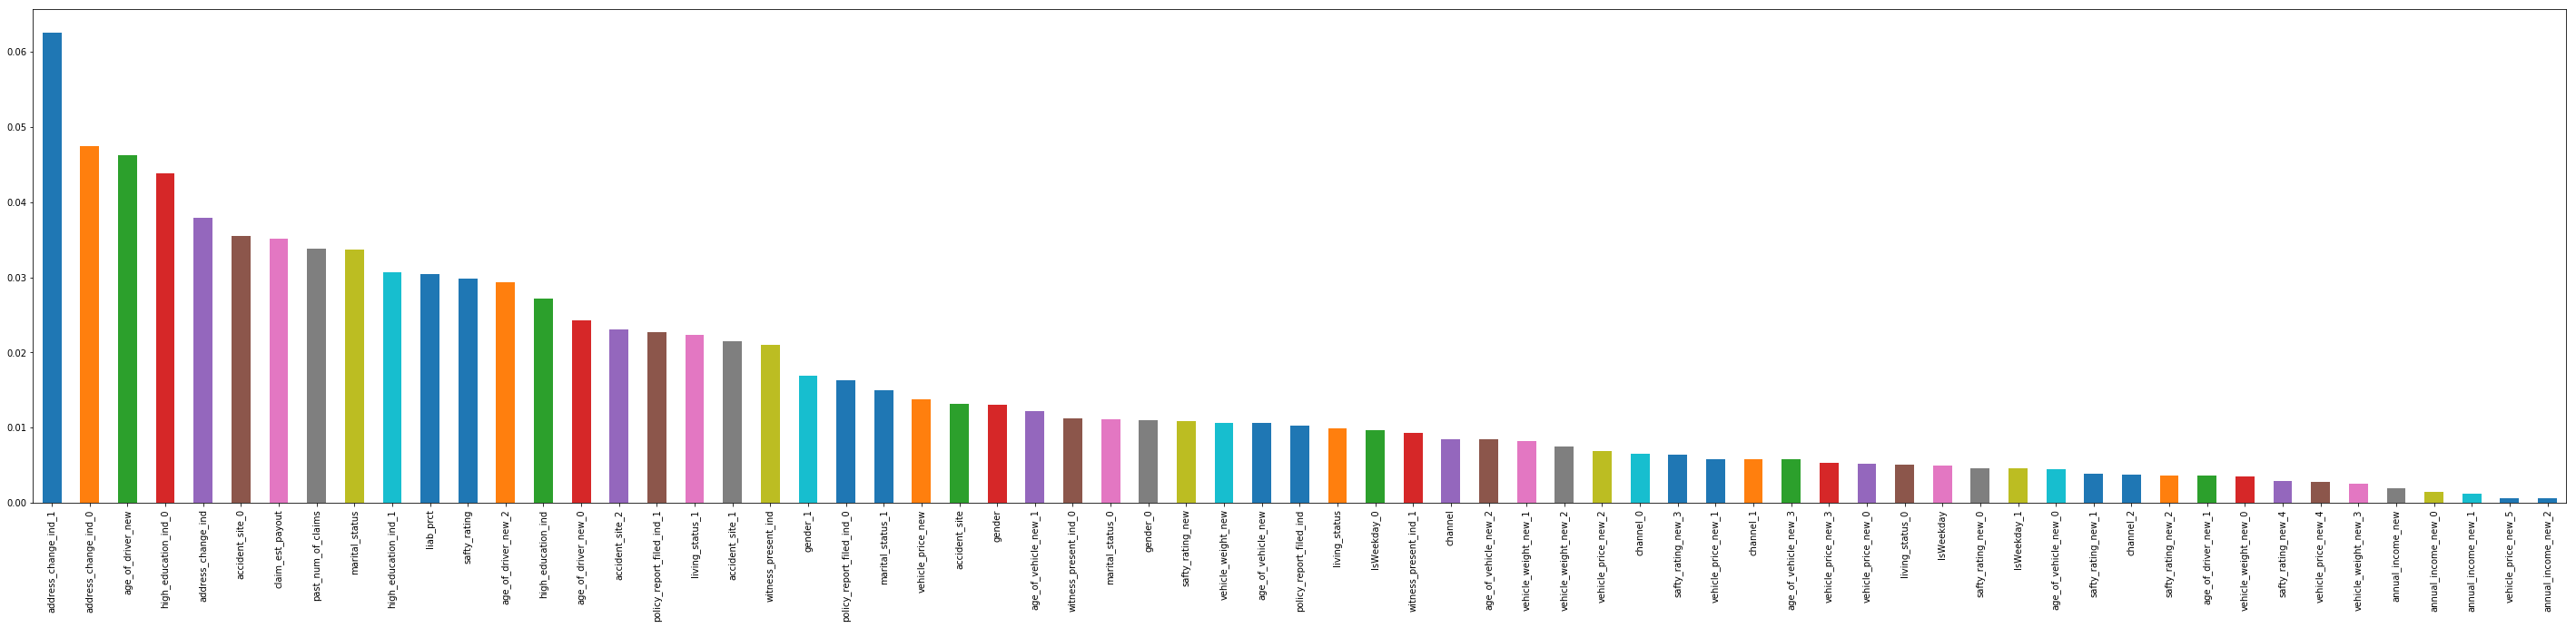

In [879]:
X_train_columns = X_train.columns
importance = pd.Series(rfc.feature_importances_)
importance.index = X_train_columns
importance.sort_values(inplace=True, ascending=False)
importance.plot.bar(figsize=(50,10))

In [ ]:
#Important features are address change indicator, age of driver, high education = 0, accident site, claimest payout,past claims,
#marital status,high education,liability pct, safety rating

Accuracy of XGboost on training set: 0.90
Accuracy of XGboost on test set: 0.85
[[3816   24]
 [ 639   14]]
              precision    recall  f1-score   support

           0       0.86      0.99      0.92      3840
           1       0.37      0.02      0.04       653

    accuracy                           0.85      4493
   macro avg       0.61      0.51      0.48      4493
weighted avg       0.79      0.85      0.79      4493



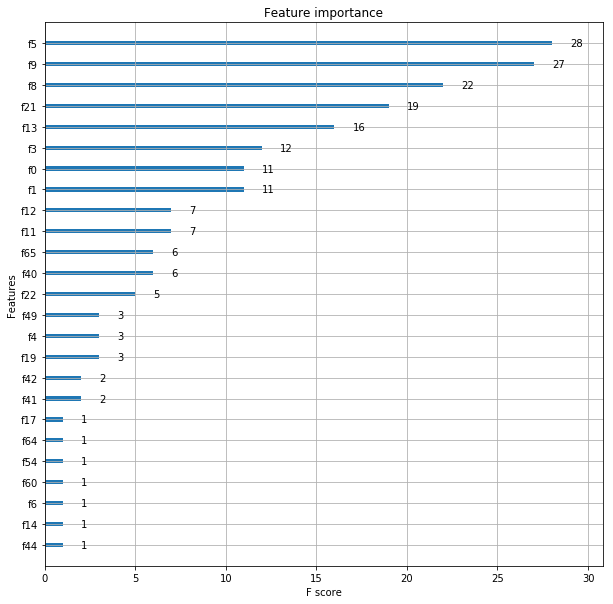

In [880]:
#fit a xgboost classifier
import xgboost as xgb
from xgboost import plot_importance
xgb_model = xgb.XGBClassifier(learning_rate= 0.1, max_depth = 5, alpha = 10, n_estimators = 10)

eval_set = [(X_test_std,Y_test)]
xgb_model.fit(X_train_std,Y_train_sm, eval_set=eval_set, verbose=False)
print('Accuracy of XGboost on training set: {:.2f}'
     .format(xgb_model.score(X_train_std, Y_train_sm)))
print('Accuracy of XGboost on test set: {:.2f}'
     .format(xgb_model.score(X_test_std, Y_test)))

pred_xgb = xgb_model.predict(X_test_std)
print(confusion_matrix(Y_test, pred_xgb))
print(classification_report(Y_test, pred_xgb))
ax = plot_importance(xgb_model)
fig = ax.figure
fig.set_size_inches(10, 10)

In [881]:
pred_final = xgb_model.predict(test_new_std)
test_new['fraud_pred'] = pred_final
test_new.head()

,accident_site,address_change_ind,channel,claim_est_payout,gender,high_education_ind,liab_prct,living_status,marital_status,past_num_of_claims,...,vehicle_price_new_3,vehicle_price_new_4,vehicle_price_new_5,IsWeekday_0,IsWeekday_1,age_of_vehicle_new_0,age_of_vehicle_new_1,age_of_vehicle_new_2,age_of_vehicle_new_3,fraud_pred
0,0,0,0,5196.552552,0,0,25,0,0,0,...,0,0,0,1,0,1,0,0,0,0
1,0,1,1,7381.165248,0,0,50,0,0,0,...,0,0,0,1,0,1,0,0,0,0
2,1,1,1,5612.123938,1,0,98,0,1,0,...,0,0,0,1,0,1,0,0,0,0
3,2,1,0,7957.267641,0,1,45,0,0,0,...,0,0,0,0,1,0,1,0,0,0
4,2,1,2,6232.195932,1,0,11,1,0,0,...,1,0,0,0,1,0,1,0,0,0
